<a href="https://colab.research.google.com/github/Fiap-RJ/FarmTech_Fase5/blob/main/NathaliaVasconcelos_rm563510_plb_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FASE 5 -FarmTech na era do cloud computing**

Entrega 1

**Importação das bibliotecas**

In [2]:

!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install xgboost

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import colors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**Importação do arquivo CSV com os dados**

In [16]:
# 1. Carregar o arquivo CSV

df = pd.read_csv("C:\\Users\\Usuario\\Documents\\GitHub\\Fase5_FarmTech\\document\\crop_yield.csv")

print("Base carregada com sucesso!")
df.sample(10)

Base carregada com sucesso!


,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield
145,"Rubber, natural",2922.18,18.43,85.51,26.23,8337
43,Oil palm fruit,2344.72,17.61,84.12,25.76,178183
142,"Rubber, natural",2892.78,18.49,86.09,26.18,10159
63,Oil palm fruit,2363.63,18.35,84.92,26.28,184629
27,"Cocoa, beans",3085.79,18.34,86.10,26.03,13056
40,Oil palm fruit,1938.42,17.54,82.11,26.11,201436
90,"Rice, paddy",2530.96,18.15,85.33,26.02,30348
98,"Rice, paddy",2646.28,18.40,86.02,26.10,31101
139,"Rubber, natural",2692.34,18.37,85.54,26.18,7435
46,Oil palm fruit,2718.08,18.30,85.43,26.12,165262


**Verificando a estrutura da base de dados**

In [17]:
print("Informações da base:")
print(df.info())
print("\n Estatísticas descritivas:")
print(df.describe())

Informações da base:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB
None

 Estatísticas descritivas:
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                156.000000                            156.000000   
mean                2486.498974                             18.203077   
std                  289.

Obs: A base de dados possui 156 amostras, não possui dado ausente e o tipo de produto está como objeto

**Análise gráfica para verificação das principais formas de clusterizar os dados**

- Verificação do gráfico por tipo de produto

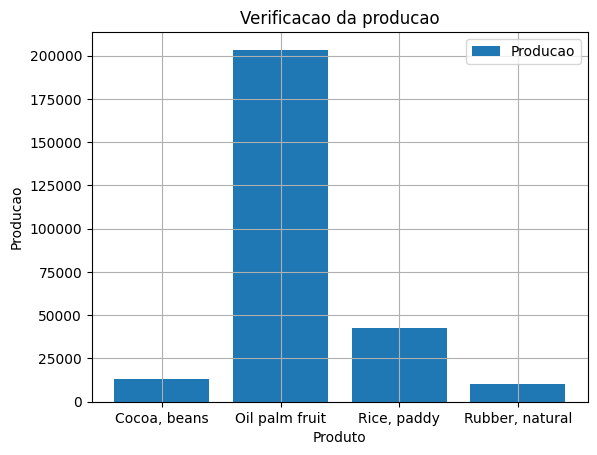

In [18]:
# Criação do gráfico
plt.bar(df['Crop'],df['Yield'], label='Producao')

# Personalização do gráfico
plt.xlabel('Produto')
plt.ylabel('Producao')
plt.title('Verificacao da producao')
plt.legend()
plt.grid(True)

# Exibe o gráfico
plt.show()

Obs: Há uma grande variação do total de produção dependendo do tipo de produto

- Verificação dos gráficos em pares

In [19]:
# Criando um dicionário para alterar o produto por número
replace_map = {'Cocoa, beans': '1','Oil palm fruit': '2','Rice, paddy': '3','Rubber, natural': '4'}

# Aplicando o dicionário na coluna 'Crop' e criando a nova coluna 'Crop_replaced'
df['Crop_replaced'] = df['Crop'].replace(replace_map)

In [20]:
# Alterando o tipo de variável da coluna 'Crop_replaced'
df['Crop_replaced'] = df['Crop_replaced'].astype(int)

# Mostrando os dados para confirmar as trocas
display(df.info())
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
 6   Crop_replaced                         156 non-null    int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 8.7+ KB


None

,Crop,Precipitation (mm day-1),Specific Humidity at 2 Meters (g/kg),Relative Humidity at 2 Meters (%),Temperature at 2 Meters (C),Yield,Crop_replaced
1,"Cocoa, beans",1938.42,17.54,82.11,26.11,11253,1
22,"Cocoa, beans",2692.34,18.37,85.54,26.18,7965,1
153,"Rubber, natural",2967.41,18.67,85.48,26.46,6842,4
15,"Cocoa, beans",2414.79,18.18,85.76,25.93,7138,1
62,Oil palm fruit,2424.55,18.28,85.16,26.18,180323,2
19,"Cocoa, beans",2751.24,18.31,85.98,26.02,9274,1
61,Oil palm fruit,2692.34,18.37,85.54,26.18,175629,2
59,Oil palm fruit,2646.28,18.40,86.02,26.10,168476,2
131,"Rubber, natural",2686.20,18.38,85.77,26.13,6448,4
78,"Rice, paddy",2248.92,17.72,83.40,26.01,28409,3


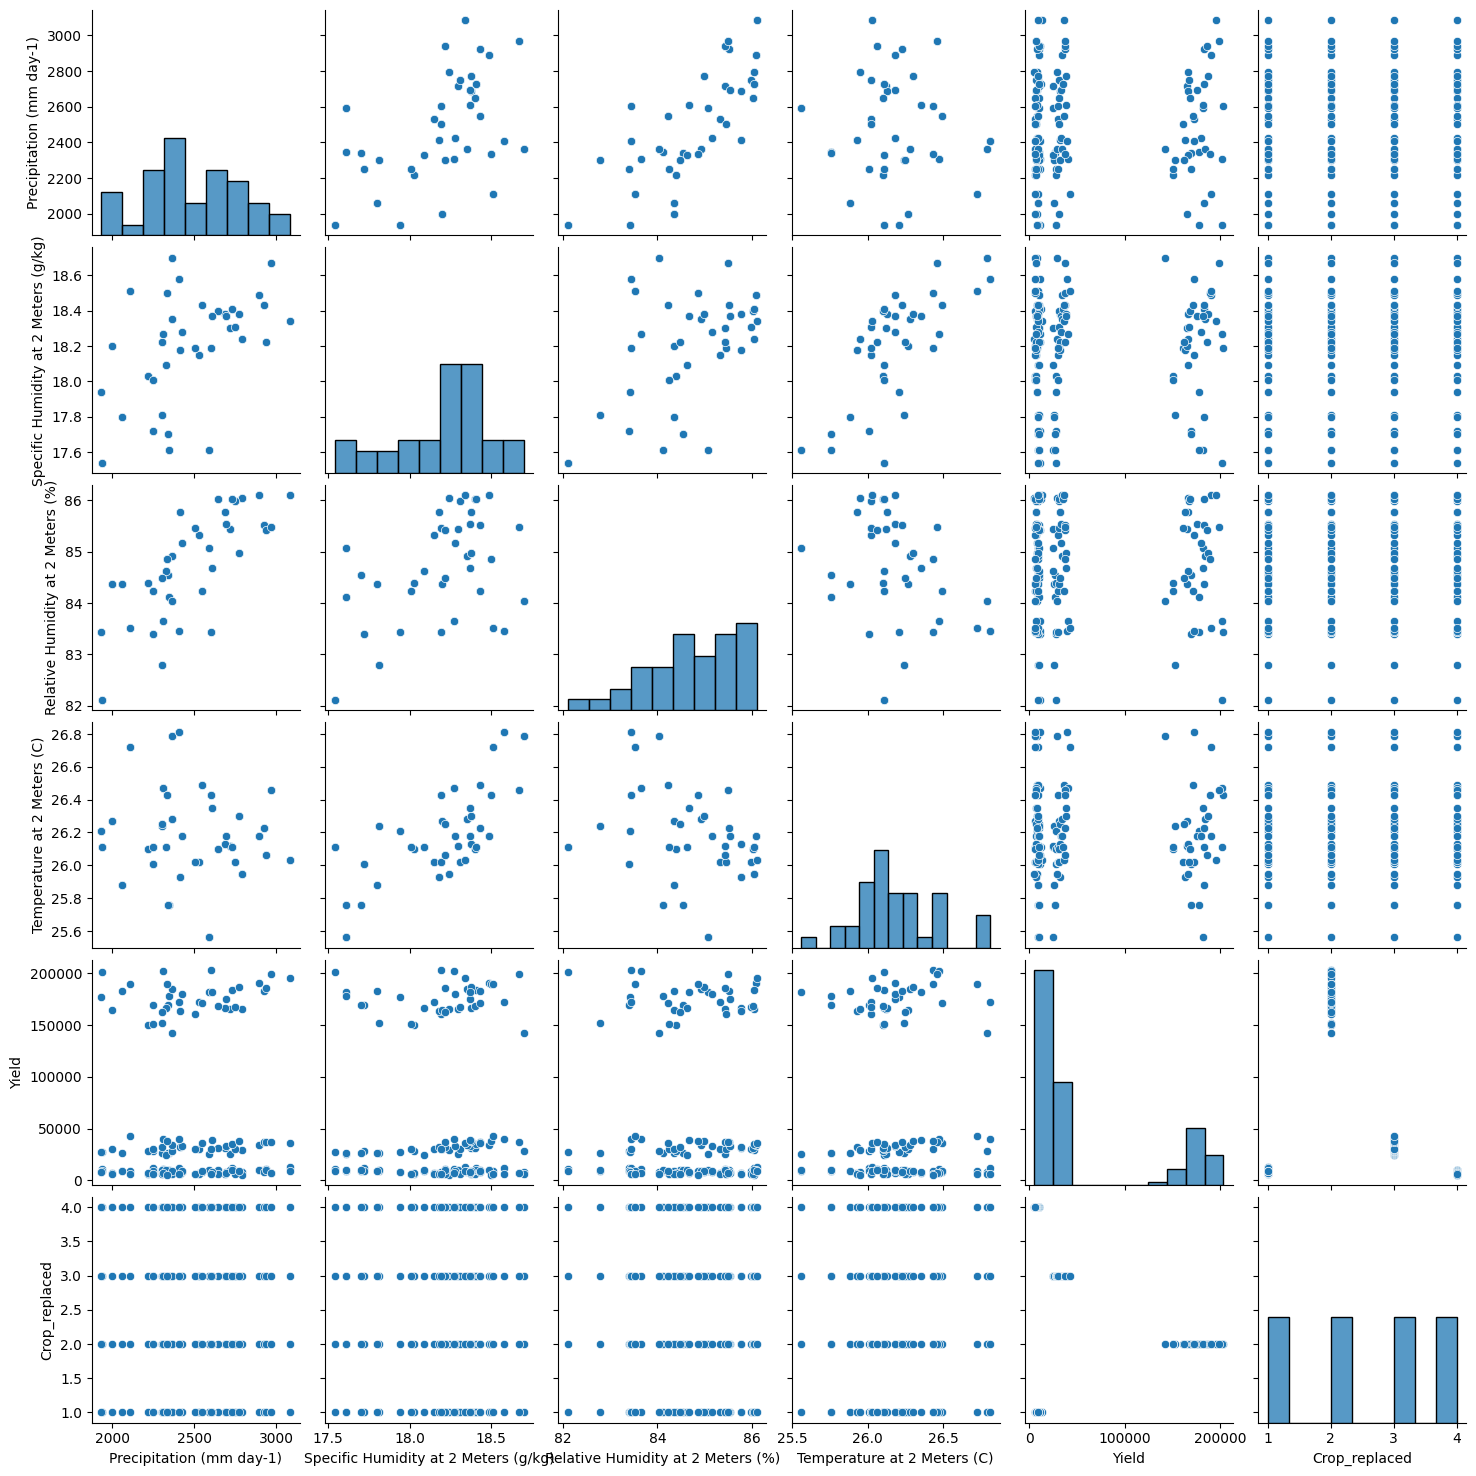

In [21]:
#Criação do gráfico em pares
sns.pairplot(df)

#Exibe o gráfico
plt.show()

Obs: Quando analisado o gráfico "Yield" x "Crop_replaced" demonstra claramente 4 principais grupos com as suas variações de produção

**Criando clusters**

1) Método K-Means

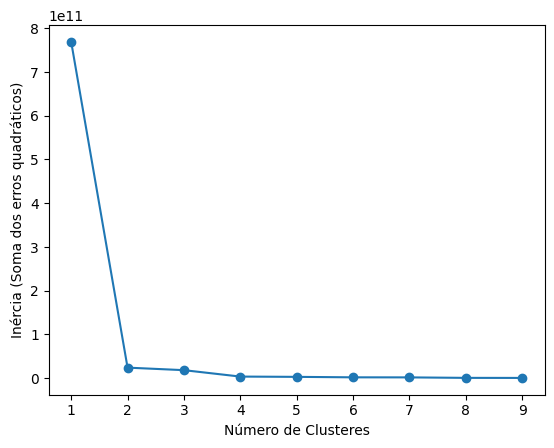

In [43]:
# Escolhendo o K pelo método do cotovelo
k=list(range(1,10))

sse=[]
for i in k:
  km=KMeans(n_clusters=i, random_state=0)
  km.fit(df[["Crop_replaced","Yield"]])
  sse.append(km.inertia_)

plt.plot(k,sse,"-o")
plt.xlabel("Número de Clusteres")
plt.ylabel("Inércia (Soma dos erros quadráticos)")
plt.show()

In [44]:
# Definição do algoritimo
kmeans=KMeans(n_clusters=4, random_state=42)

# Implementa o K-Means sobre dados específicos
kmeans.fit(df[["Crop_replaced","Yield"]])

# Obtendo o centróide do método
centroids=kmeans.cluster_centers_

# Salva os grupos dos clusters para cada exemplo
kmeans_labels=kmeans.predict(df[["Crop_replaced","Yield"]])



In [45]:
centroids

array([[2.00000000e+00, 1.63301579e+05],
       [2.50000000e+00, 8.35401282e+03],
       [2.00000000e+00, 1.87682650e+05],
       [3.00000000e+00, 3.20996667e+04]])

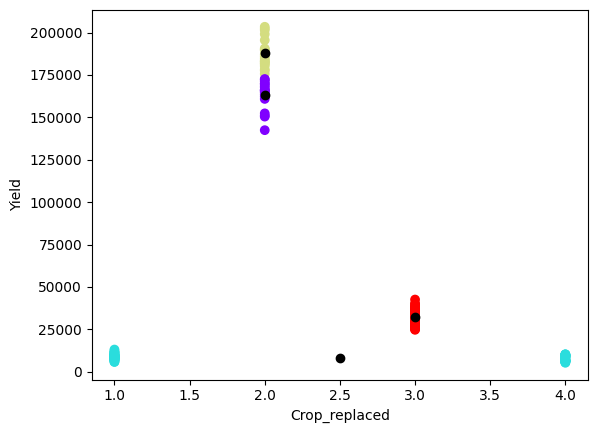

In [46]:
# Plotando a clusterização
plt.scatter(df["Crop_replaced"],
            df["Yield"],
            c=kmeans_labels,
            cmap="rainbow")
plt.xlabel("Crop_replaced")
plt.ylabel("Yield")


plt.scatter(centroids[:,0],
            centroids[:,1],
            color="black")

Obs: Mesmo observando claramente os 4 grupos destintos devido ao tipo de produto, a classificação separou de forma diferente. Foram consideradas dois produtos em um mesmo grupo e a produção de um dos produtos foi separada em dois grupos.

2) Método DBSCAN

In [47]:
# Instancia do algoritmo
dbscan=DBSCAN(eps=5000, min_samples=10)

# Roda o algoritmo sobre os dados
dbscan.fit(df[["Crop_replaced","Yield"]])

# Obtém atribuições dos pontos
dbscan_labels=dbscan.labels_

dbscan_labels



array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1, -1, -1,  2,  2,  1,  1,  1,  2,  2, -1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  2,  2,  2,  2,  2, -1,  2,
        1,  2,  2,  2, -1, -1,  1, -1,  2,  2,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0])

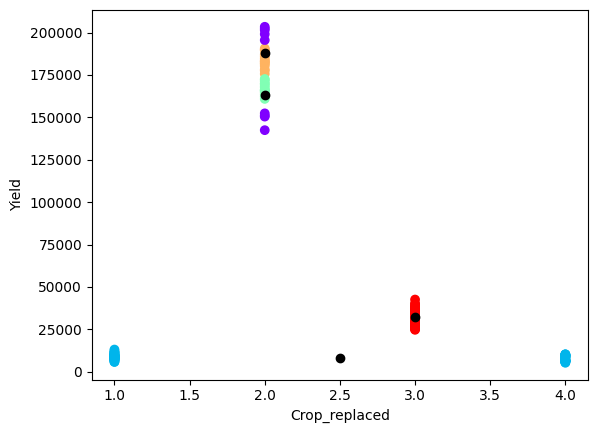

In [48]:
# Plotando a clusterização
plt.scatter(df["Crop_replaced"],
            df["Yield"],
            c=dbscan_labels,
            cmap="rainbow")
plt.xlabel("Crop_replaced")
plt.ylabel("Yield")


plt.scatter(centroids[:,0],
            centroids[:,1],
            color="black")

Retirando os outliers

Text(0, 0.5, 'Yield')

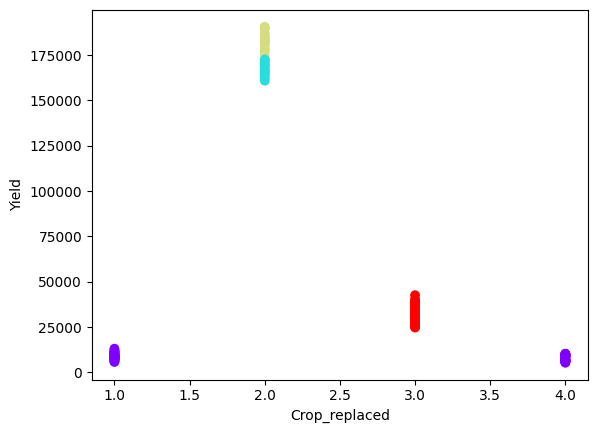

In [49]:
mascara=(dbscan_labels>=0)

plt.scatter(df[mascara]["Crop_replaced"],
            df[mascara]["Yield"],
            c=dbscan_labels[mascara],
            cmap="rainbow")
plt.xlabel("Crop_replaced")
plt.ylabel("Yield")

Obs: Os grupos ficaram bem semelhantes nos dois métodos de classificação apresentados.

**Aplicando os modelos preditivos**

In [50]:
# Dados e labels (usando os mesmos que a regressão múltipla)
X = df.drop(columns=["Precipitation (mm day-1)",
                     "Specific Humidity at 2 Meters (g/kg)",
                     "Relative Humidity at 2 Meters (%)",
                     "Temperature at 2 Meters (C)",
                     "Crop"]) # Changed to drop 'Crop' instead of 'Crop_replaced'
y = df["Yield"]


# Treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42
)

# Padronização dos dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Dicionário para armazenar os resultados de cada modelo
results = {}

# Função para treinar e avaliar o modelo
def evaluate_model(model, model_name):
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  results[model_name] = {'mse': mse, 'mae': mae, 'r2': r2}
  print(f"{model_name}:")
  print(f"  MSE = {mse}")
  print(f"  MAE = {mae}")
  print(f"  R² = {r2}")
# XGBoost
xgb_model = xgb.XGBRegressor()
evaluate_model(xgb_model, 'XGBoost')

# SVM
svm_model = SVR()
evaluate_model(svm_model, 'SVM')

# KNN
knn_model = KNeighborsRegressor()
evaluate_model(knn_model, 'KNN')

# Árvore de Decisão
tree_model = DecisionTreeRegressor()
evaluate_model(tree_model, 'Decision Tree')

# Random Forest
rf_model = RandomForestRegressor()
evaluate_model(rf_model, 'Random Forest')

# Comparação dos modelos
print("\nComparação dos modelos:")
results_df = pd.DataFrame(results).transpose()
print(results_df)

XGBoost:
  MSE = 214779968.0
  MAE = 2818.493896484375
  R² = 0.9524351358413696
SVM:
  MSE = 5118849966.298652
  MAE = 42946.59684589094
  R² = -0.13361387353178067
KNN:
  MSE = 4045917.772765963
  MAE = 670.80425531915
  R² = 0.9991039962982754
Decision Tree:
  MSE = 2114522.659574468
  MAE = 530.4468085106383
  R² = 0.9995317205547003
Random Forest:
  MSE = 1998475.6326170273
  MAE = 457.57276595744787
  R² = 0.9995574201787578

Comparação dos modelos:
                        mse           mae        r2
XGBoost        2.147800e+08   2818.493896  0.952435
SVM            5.118850e+09  42946.596846 -0.133614
KNN            4.045918e+06    670.804255  0.999104
Decision Tree  2.114523e+06    530.446809  0.999532
Random Forest  1.998476e+06    457.572766  0.999557


Obs.: Analisando o quadro comparativo de modelos pode-se observar que talvez esses não sejam os melhores modelos, pois o erro médio absoluto e o erro quadratico médio deveriam estar mais próximo de zero. Contudo, considerando os cinco modelos apresentados, o "Random Forest" seria o mais adequado já que apresentou os menores resultados para mse e mae, além do maior resultado para o r2.